# Regression Analysis with the diabetes dataset

[Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University

Apr 12, 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns    
sns.set()
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Frist of all, load the data

In [2]:
diabetes = datasets.load_diabetes()

# load data into a Pandas DataFrame when you need to do EDA.
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target # only for plot the first figure.

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


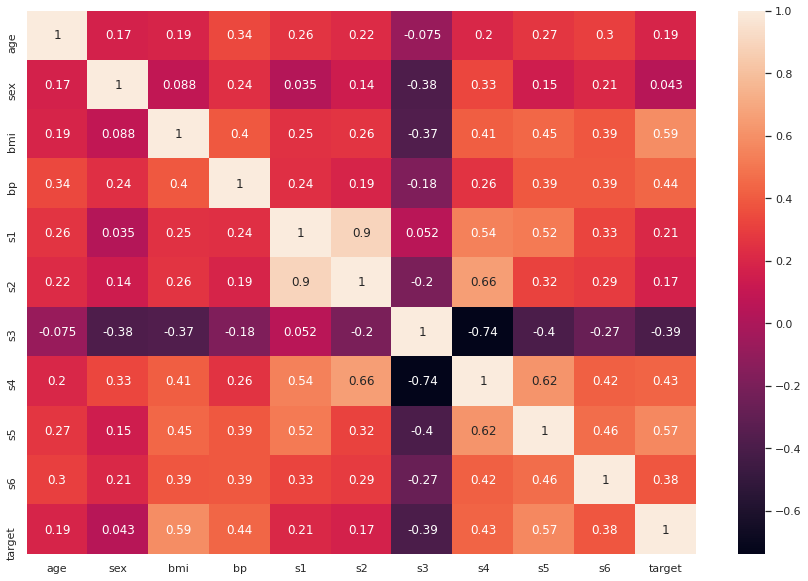

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

### Build a multilinear regression model with those 3 features
Top 3 features that are correlated with the target are bmi (0.59), s5 (0.57), and bp (0.44)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['bmi',"bp", "s5"]]
y = df[["target"]]

multi_reg = LinearRegression()
multi_reg.fit(X, y)

y_pred = multi_reg.predict(X)

print('Coefficients:', multi_reg.coef_)
print('MSE:', mean_squared_error(y, y_pred) )
print('R-sq:', r2_score(y, y_pred) )

Coefficients: [[603.07435575 262.27488392 543.87245014]]
MSE: 3083.0490338631253
R-sq: 0.48008281990946056


In [10]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Build a Ridge regression model with the top correlated feature

In [11]:
from sklearn.linear_model import Ridge
# Top correlated feature is bmi
X=df[["bmi"]]
y=df["target"]

rig_reg = Ridge(alpha=0.05, normalize=True)

rig_reg.fit(X, y)

y_pred = rig_reg.predict(X)

#R2_score
rig_reg.score(X, y)

0.343143887753214

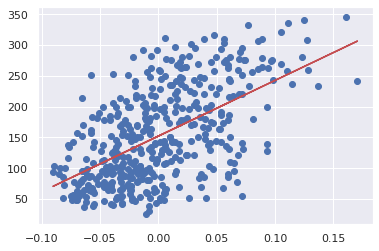

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='r');

## Build a Deep Neural Network with 3 hidden Dense layers with all the features.

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Load the data again

In [14]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

In [15]:
X = df.drop("target", axis = 1)
y = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [16]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
198,-0.052738,-0.044642,0.054152,-0.026328,-0.055231,-0.033881,-0.013948,-0.039493,-0.074089,-0.059067
268,0.063504,0.050680,0.088642,0.070073,0.020446,0.037517,-0.050764,0.071210,0.029300,0.073480
209,0.038076,0.050680,-0.018062,0.066630,-0.051103,-0.016658,-0.076536,0.034309,-0.011901,-0.013504
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019908,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504
...,...,...,...,...,...,...,...,...,...,...
63,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494
326,0.045341,0.050680,-0.008362,-0.033214,-0.007073,0.001191,-0.039719,0.034309,0.029936,0.027917
337,0.019913,0.050680,-0.012673,0.070073,-0.011201,0.007141,-0.039719,0.034309,0.005384,0.003064
11,0.027178,0.050680,0.017506,-0.033214,-0.007073,0.045972,-0.065491,0.071210,-0.096433,-0.059067


In [17]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(12, input_dim=10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model (set verbose to True to see the output)
model.fit(X_train, y_train, validation_split=0.2, epochs=400, verbose=False)

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE:', mean_squared_error(y_test, y_pred) )

print('R-sq:', r2_score(y_test, y_pred) )

MSE: 3239.7287608786687
R-sq: 0.477877984987367


## Comparing Different Methods
1. R2 - Multi-linear: 0.48008281990946056
2. R2 - Ridge: 0.343143887753214
2. R2 - Deep Learning: 0.4773411304310343

R2 score of the multi-linear method is comparable to that of the Deep Learning regressor. For the multi-linear method, we will need to manually extract the features. For this dataset, those 3 features give a relative good result, which is comparable to that from the Deep Learning method, which considers all the features. With only one feature selected, the error with the Ridge method is expected to be big for this data set.